<font size="5"><b><center>SOCIAL MEDIA SCRAPPING</center></b></font>

Social media scraping involves the automated process of collecting data from various social media platforms. This data can encompass a wide range of information, including posts, comments, likes, shares, user profiles, and more. Developers typically use specialized tools and libraries to scrape data efficiently from platforms such as Facebook, Twitter, Instagram, LinkedIn, Reddit, and others. These tools may include web scraping frameworks like BeautifulSoup and Scrapy, as well as APIs provided by social media platforms.

Accessing data through APIs (Application Programming Interfaces) is a common method used in social media scraping. APIs provide developers with structured endpoints to retrieve specific types of data, such as posts, comments, user profiles, and engagement metrics. However, it's crucial for developers to adhere to the terms of service and privacy policies of each platform to avoid legal consequences, account suspension, or IP bans.

Once the data is collected, it can be analyzed to derive valuable insights into user behavior, trends, sentiment analysis, and more. This analysis is beneficial for businesses, researchers, marketers, and social media influencers seeking to understand and leverage the vast amounts of data available on social media platforms.

<font size="4"><b>REDDIT API</b></font>

Today, we're diving into the world of Reddit API. Reddit, often referred to as the "front page of the internet," is a vast platform where users can share news, stories, memes, and discussions across various communities known as subreddits.<N>

•	The Reddit API allows developers to programmatically access and interact with Reddit's vast repository of user-generated content.<N> 

•	With the Reddit API, developers can retrieve posts, comments, user information, subreddit data, and more, enabling them to build applications, conduct research, and analyze trends within the Reddit community.<N>

•	Whether it's creating a custom Reddit bot, monitoring discussions, or analyzing user engagement, the Reddit API offers a wealth of possibilities for those looking to explore and harness the rich data available on Reddit.


<font size="3"><b>AUTHENTICATION</b></font>

In [31]:
# Install the PRAW library
!pip install praw
# Upgrade pip to the latest version
!pip install --upgrade pip
# Import the PRAW library
import praw
# Define a user agent for Reddit API access
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
# Initialize a Reddit instance with your client ID, client secret, and user agent
reddit = praw.Reddit(
    client_id="Wh5cuCdnDE0TlrdwqRs1qA",
    client_secret="WXreR0UqYEA-lkRKSdpOUYsbeReo1Q",
    user_agent=user_agent
)

<font size="3"><b>GET TRENDING TOPIC FROM SUBREDDIT</b></font>

<font size="2">The <B>"bitcoin"</B> subreddit channel will be use for this project</font>

In [32]:
!pip install pandas
!pip install numpy
!pip install pyarrow

import pandas as pd
import numpy as np
import re #RegEx : Regular expression# Hot new rising topics

# Retrieving data from the "bitcoin" subreddit
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
    
# Print the number of unique headlines retrieved    
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
199
0.94
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


<font size="3"><b>GET TOTAL COMMENT IN SUBREDDIT</b></font>

In [33]:
# Initialize an empty set to store unique submission titles
headlines = set()
# Iterate over each submission in the "bitcoin" subreddit that is currently hot
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    # Add the title of each submission to the set of headlines
    headlines.add(submission.title)
# Print the total number of unique titles collected
print(len(headlines))

786


<font size="3"><b>CREATING A DATAFRAME</b></font>

In [34]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Is Craig Wright really Satoshi Nakamoto?
1,Lost all of my BTC in my Exodus wallet
2,Bitcoin for good
3,Bitcoin What If
4,Another big dump!


<font size="3"><b>DISPLAYING ROWS OF A DATAFRAME</b></font>

In [35]:
#df = df.iloc[:, 1:]
# Display the first few rows of the Bitcoin DataFrame
bitcoin_df.head()

,0
0,Is Craig Wright really Satoshi Nakamoto?
1,Lost all of my BTC in my Exodus wallet
2,Bitcoin for good
3,Bitcoin What If
4,Another big dump!


<font size="3"><b>DISPLAYING COLUMNS OF A DATAFRAME</b></font>

In [36]:
# Display the column names of the Bitcoin DataFrame
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

<font size="3"><b>RENAMING COLUMN OF A DATAFRAME</b></font>

In [37]:
# Renaming the column of the Bitcoin DataFrame to 'Titles' and displaying the first few rows
bitcoin_df.columns = ['Titles']
bitcoin_df.head()

,Titles
0,Is Craig Wright really Satoshi Nakamoto?
1,Lost all of my BTC in my Exodus wallet
2,Bitcoin for good
3,Bitcoin What If
4,Another big dump!


<font size="3"><b>CHECKING DUPLICATE TITLES OF A DATAFRAME</b></font>

In [38]:
# Checking for duplicate titles in the Bitcoin DataFrame and counting the occurrences
bitcoin_df.Titles.duplicated().sum() 

0

<font size="3"><b>CLEANING THE TEXT</b></font>

In [39]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Is Craig Wright really Satoshi Nakamoto?
1,Lost all of my BTC in my Exodus wallet
2,Bitcoin for good
3,Bitcoin What If
4,Another big dump!


<font size="3"><b>REMOVING EMOJI AND UNICODE</b></font>

In [40]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Is Craig Wright really Satoshi Nakamoto?
1,Lost all of my BTC in my Exodus wallet
2,Bitcoin for good
3,Bitcoin What If
4,Another big dump!


<font size="3"><b>SENTIMENT ANALYSIS OF BITCOIN</b></font>

In [41]:
!pip install textblob

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Is Craig Wright really Satoshi Nakamoto?,0.2,0.2
1,Lost all of my BTC in my Exodus wallet,0.0,0.0
2,Bitcoin for good,0.6,0.7
3,Bitcoin What If,0.0,0.0
4,Another big dump!,0.1,0.0


<font size="3"><b>CATEGORIZING BITCOIN REDDIT POSTS</b></font>

In [42]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Apply the getInsight function to the "Polarity" column of the DataFrame
# and store the resulting sentiment insights in a new column named "Insight"   
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

# Display the first 50 rows of the DataFrame with the newly added "Insight" column
bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Is Craig Wright really Satoshi Nakamoto?,0.200000,0.200000,Positive
1,Lost all of my BTC in my Exodus wallet,0.000000,0.000000,Neutral
2,Bitcoin for good,0.600000,0.700000,Positive
3,Bitcoin What If,0.000000,0.000000,Neutral
4,Another big dump!,0.100000,0.000000,Neutral
5,21 Million,0.000000,0.000000,Neutral
6,There will only be less than 21m Bitcoins…,0.533333,-0.083333,Negative
7,Current BTC Miners Reserves.,0.400000,0.000000,Neutral
8,"Bank recommendation, please I'm desperate...",1.000000,-0.600000,Negative
9,Genesis GBTC Shares In Gemini Earn,0.000000,0.000000,Neutral


<font size="3"><b>DATA VISUALIZATION<b></font>

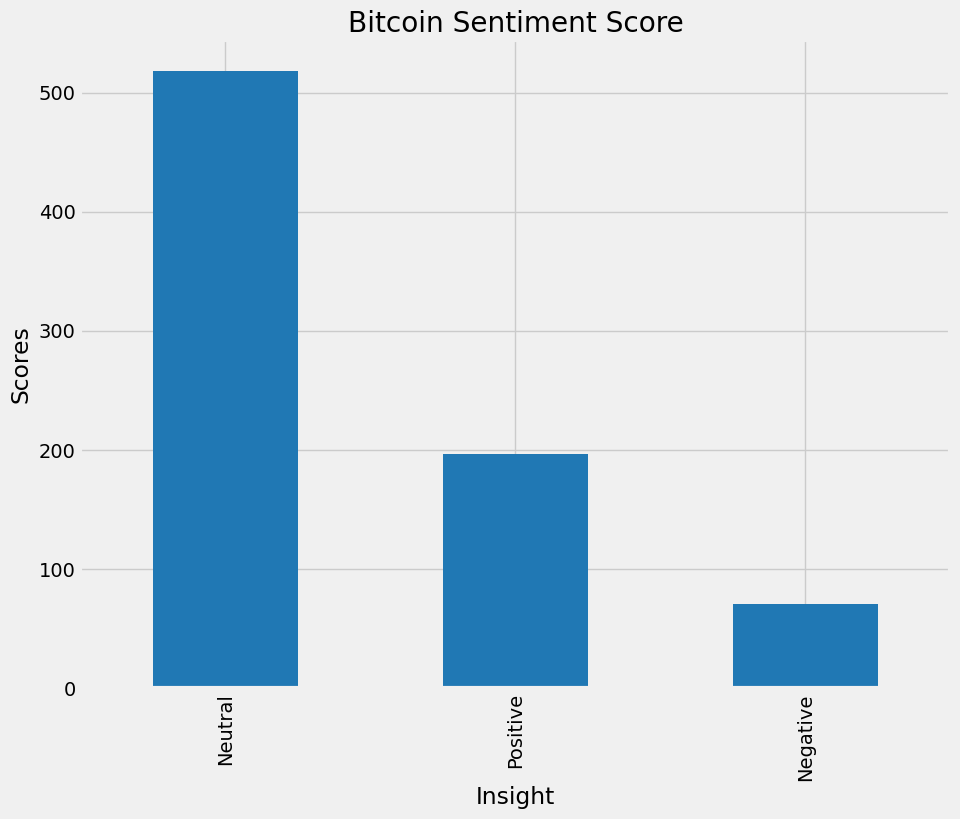

In [43]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Set the plotting style
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

<font size="3"><b>WORD CLOUD<b></font>

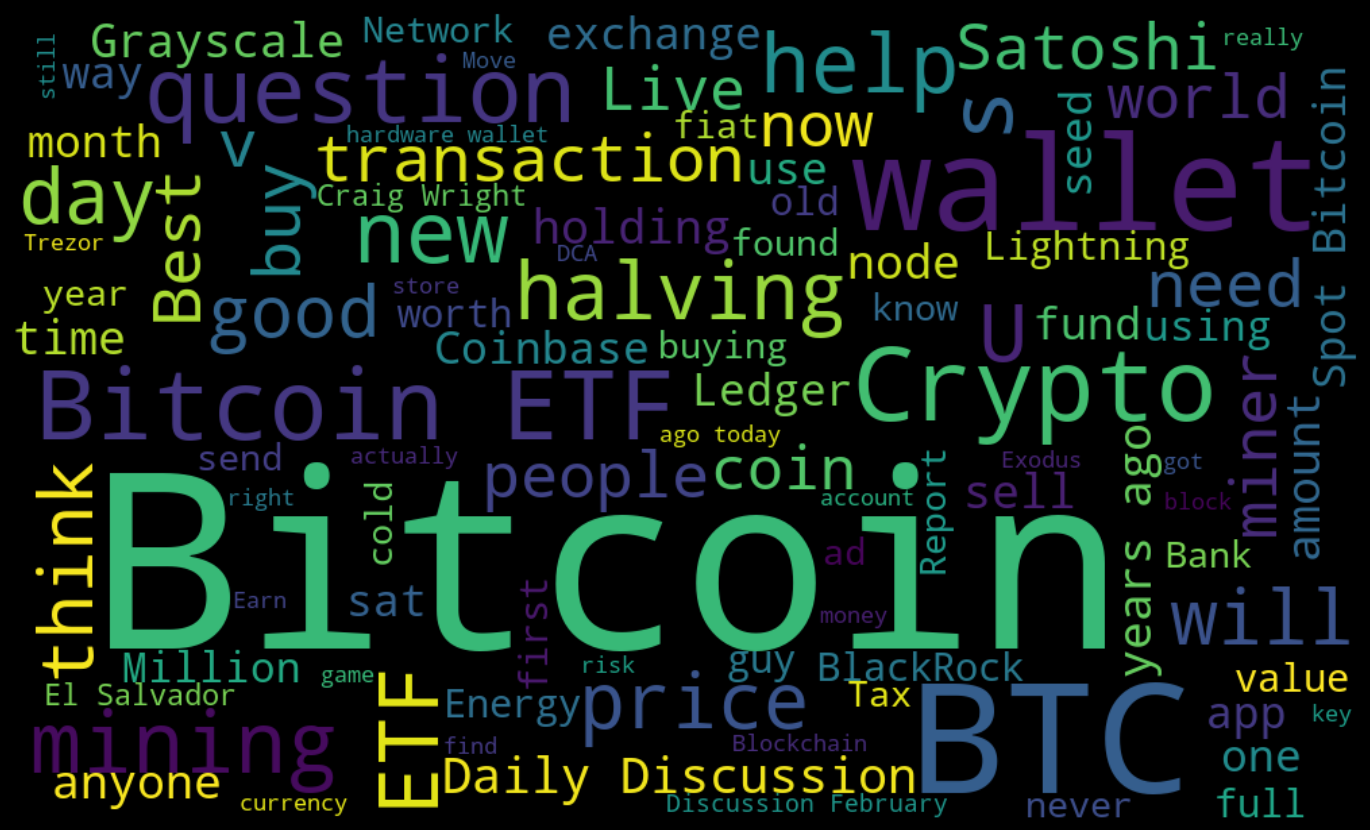

In [44]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");